## План работы с текстом sklearn
1) Загрузить базу данных
2) Посмотреть распределение данных на диаграмме
3) Привести данные к одному типу
4) Посмотреть на примеры сообщений для каждого результата
5) Разделить данные на тестовые и тренировочные + посмотреть на баланс между значениями результата
6) Токенизация
7) Удаление пунктуации
8) Удаление стоп-слов
9) Стемминг - удаление окончаний
10) Обучить векторизатор
11) Обучить модель
12) Проверить работоспособность модели на единичном примере
13) Оценить качество модели
14) Посмотреть на графике метрики precision и recall
15) Улучшить модель с помощью GridSearchCV
16) Обучить модель с полученными параметрами
17) Оценить новые результаты

# Импорт библиотек

In [2]:
import sys
import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12940\4056913804.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Импорт данных

In [3]:
df = pd.read_csv(fr"C:\ML\DataBases\russian_toxic_comments.csv", sep=",")
df

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0
...,...,...
14407,Вонючий совковый скот прибежал и ноет. А вот и...,1.0
14408,А кого любить? Гоблина тупорылого что-ли? Или ...,1.0
14409,"Посмотрел Утомленных солнцем 2. И оказалось, ч...",0.0
14410,КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...,1.0


In [4]:
df.shape

(14412, 2)

# Обработка данных

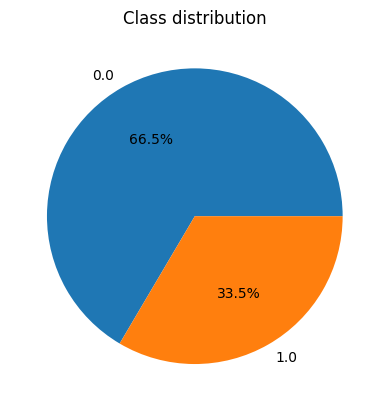

In [5]:
df['toxic'].value_counts().plot(kind='pie', title='Class distribution', autopct='%1.1f%%')
plt.axis('off')
plt.show()

## Приведение к одному типу

In [6]:
df["toxic"] = df["toxic"].apply(int)
df

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1
...,...,...
14407,Вонючий совковый скот прибежал и ноет. А вот и...,1
14408,А кого любить? Гоблина тупорылого что-ли? Или ...,1
14409,"Посмотрел Утомленных солнцем 2. И оказалось, ч...",0
14410,КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...,1


In [7]:
df["toxic"].value_counts()

toxic
0    9586
1    4826
Name: count, dtype: int64

In [8]:
for true_value in df[df['toxic'] == 1]['comment'].head(5):
    print(true_value)

Верблюдов-то за что? Дебилы, бл...

Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

Собаке - собачья смерть

Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?

тебя не убедил 6-страничный пдф в том, что Скрипалей отравила Россия? Анализировать и думать пытаешься? Ватник что ли?)



In [9]:
for false_value in df[df['toxic'] == 0]['comment'].head(5):
    print(false_value)

В шапке были ссылки на инфу по текущему фильму марвел. Эти ссылки были заменены на фразу Репортим брипидора, игнорируем его посты. Если этого недостаточно, чтобы понять, что модератор абсолютный неадекват, и его нужно лишить полномочий, тогда эта борда пробивает абсолютное дно по неадекватности.

Почитайте посты у этого автора,может найдете что нибудь полезное. Надеюсь помог) https: pikabu.ru story obyichnyie budni dezsluzhbyi 4932098

Про графику было обидно) я так то проходил все серии гта со второй части по пятую, кроме гта 4. И мне не мешала графика ни в одной из частей. На компе у меня было куча видеокарт. Начиная с 32мб RIVA TNT и заканчивая 2Гб 560Ti на которой я спокойно играю который год в танки, гта5, ведьмака3 купил на распродаже и начал проходить. Да, не на ультрах. С пониженными текстурами. И не мешает. Я не понимаю дрочева на графике, требовать графику уровня плойки 4 минимум. Мне надо чтобы глаза не резало, только и всего. По поводу управления, мне не хватает переходника

## Разделение данных на тренировочные и тестовые

In [10]:
train_df, test_df = train_test_split(df, test_size=500, shuffle=True, random_state=0)

In [11]:
test_df.shape

(500, 2)

In [12]:
test_df["toxic"].value_counts()

toxic
0    346
1    154
Name: count, dtype: int64

In [13]:
train_df["toxic"].value_counts()

toxic
0    9240
1    4672
Name: count, dtype: int64

## Токенизация

In [14]:
sentence_example = df.iloc[0]["comment"]
print(f"Исходный текст: {sentence_example}")

Исходный текст: Верблюдов-то за что? Дебилы, бл...



In [15]:
tokens = word_tokenize(sentence_example, language='russian') 
print(f"Токены: {tokens}")

Токены: ['Верблюдов-то', 'за', 'что', '?', 'Дебилы', ',', 'бл', '...']


## Удаление пунктуации

In [16]:
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
print(f"Токены без пунктуации: {tokens_without_punctuation}")

Токены без пунктуации: ['Верблюдов-то', 'за', 'что', 'Дебилы', 'бл', '...']


## Удаление стоп-слов 

In [17]:
russian_stop_words = stopwords.words('russian')
tokens_without_russian_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in russian_stop_words] 
print(f"Токены без пунктуации и стоп слов: {tokens_without_russian_stop_words_and_punctuation}")

Токены без пунктуации и стоп слов: ['Верблюдов-то', 'Дебилы', 'бл', '...']


## Стемминг = удаление окончаний

In [18]:
snowball = SnowballStemmer(language='russian')
stemmed_tokens = [snowball.stem(word) for word in tokens_without_russian_stop_words_and_punctuation] 
print(f"Токены после стемминга: {stemmed_tokens}")

Токены после стемминга: ['верблюдов-т', 'дебил', 'бл', '...']


In [19]:
print(f"Исходный текст: {sentence_example}")
print(f"Обработанный текст: {stemmed_tokens}")

Исходный текст: Верблюдов-то за что? Дебилы, бл...

Обработанный текст: ['верблюдов-т', 'дебил', 'бл', '...']


In [20]:
russian_stop_words = stopwords.words('russian')
snowball = SnowballStemmer(language='russian')

def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language = 'russian')
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

tokenize_sentence(sentence_example)

['верблюдов-т', 'дебил', 'бл', '...']

# TF-IDF = учет важность слова

TF-IDF — это метод векторизации признаков, широко используемый при анализе текста. TF-IDF помогает отразить важность слова как в документе, так и во всем корпусе. Корпус – это совокупность всех документов. TF-IDF состоит из двух компонентов: частоты термина (TF) и частоты обратного документа (IDF).

![](https://associatedpresscapstone.github.io/img/tfidf.png)

TF рассчитывается как отношение встречаемости слов к общему количеству слов в документе. 

IDF подсчитывается для каждого слова в словаре, а не в документе. 

N — количество документов в корпусе, 

DF — количество документов, в которых встречается это слово. Если слово встречается во всех документах, то IDF = 0.

In [21]:
vectorizer = TfidfVectorizer(tokenizer = lambda x: tokenize_sentence(x, remove_stop_words = True))
features = vectorizer.fit_transform(train_df['comment'])

c:\Python\python_3.11.8\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# Обучение модели

In [22]:
model = LogisticRegression(random_state=0)
model.fit(features, train_df['toxic'])

LogisticRegression(random_state=0)

In [23]:
model.predict(features[0])

array([0], dtype=int64)

In [24]:
train_df['comment'].iloc[0]

'Кровопускание уже вернулось:\n'

## Pipleine

![](https://spark-school.ru/wp-content/uploads/2021/01/ml-pipelinemodel2.png)

In [25]:
model_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer = lambda x: tokenize_sentence(x, remove_stop_words = True))),
    ('model', LogisticRegression(random_state = 0))
])

model_pipeline.fit(train_df['comment'], train_df['toxic'])

c:\Python\python_3.11.8\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000001CFABE5CB80>)),
                ('model', LogisticRegression(random_state=0))])

In [26]:
model_pipeline.predict(["Привет, как дела?"])

array([0], dtype=int64)

In [27]:
model_pipeline.predict(["Слушай, а не пойти бы тебе?"])

array([1], dtype=int64)

# Оценка модели

Для оценки качества алгоритма на каждом из классов отдельно вводятся метрики точности Precision и полноты Recall.

![](https://hsto.org/getpro/habr/post_images/164/93b/c89/16493bc899f7275f3b5ff8d45a3ed2e2.svg)

Precision = доля объектов, названных классификатором положительными и в то же время действительно являющихся положительными.
(отношение правильно предсказанных объектов к общему числу объектов)  

Recall = доля объектов положительного класса из всех объектов положительного класса найденных алгоритмом.

![](https://sphire.mpg.de/wiki/lib/exe/fetch.php?cache=&media=pipeline:window:cryolo:precision_recall.png)

In [28]:
print(f"Precision: {precision_score(test_df['toxic'], model_pipeline.predict(test_df['comment']))}")
print(f"Recall: {recall_score(test_df['toxic'], model_pipeline.predict(test_df['comment']))}")

Precision: 0.9196428571428571
Recall: 0.6688311688311688


На самом деле модель логистической регрессии возвращает не принадлежность к классу, а вероятность нахождения в классе. И лишь только метод predict, сравнивая эту вероятность с порогом, относит его к конкретному клссу

In [29]:
# если вероятность (1 столбец) > порога (2 столбец) => 0 иначе 1
model_pipeline.predict_proba(test_df['comment']) 

array([[0.90119628, 0.09880372],
       [0.83693866, 0.16306134],
       [0.79336219, 0.20663781],
       [0.89812857, 0.10187143],
       [0.90408339, 0.09591661],
       [0.86907404, 0.13092596],
       [0.8823974 , 0.1176026 ],
       [0.68251943, 0.31748057],
       [0.88101372, 0.11898628],
       [0.44379173, 0.55620827],
       [0.26015918, 0.73984082],
       [0.49480994, 0.50519006],
       [0.73407931, 0.26592069],
       [0.38709455, 0.61290545],
       [0.85810737, 0.14189263],
       [0.9338285 , 0.0661715 ],
       [0.92180988, 0.07819012],
       [0.2069328 , 0.7930672 ],
       [0.92611356, 0.07388644],
       [0.90923927, 0.09076073],
       [0.79649526, 0.20350474],
       [0.83440976, 0.16559024],
       [0.8044926 , 0.1955074 ],
       [0.53692231, 0.46307769],
       [0.21130851, 0.78869149],
       [0.74876819, 0.25123181],
       [0.32179389, 0.67820611],
       [0.850319  , 0.149681  ],
       [0.97286737, 0.02713263],
       [0.84564622, 0.15435378],
       [0.

In [30]:
model_pipeline.predict(test_df['comment'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [31]:
prec, rec, thresholds = precision_recall_curve(test_df['toxic'], 
                                               model_pipeline.predict_proba(test_df['comment'])[:, 1])

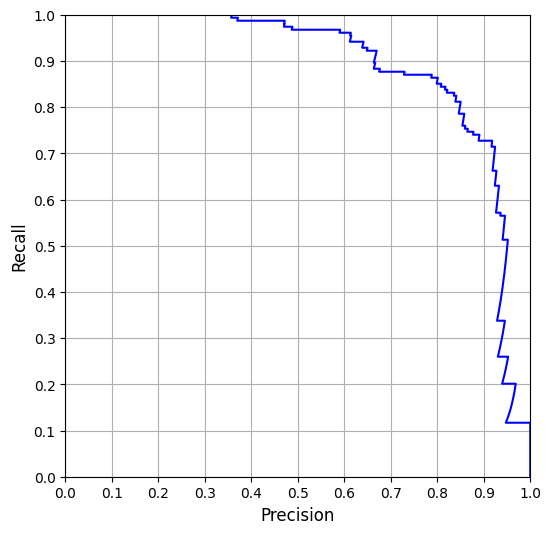

In [32]:
plt.figure(figsize=(6, 6))
plt.grid(True)
plt.plot(prec, rec, color='blue')
plt.xlabel('Precision', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks(np.linspace(0, 1, 10 + 1))
plt.yticks(np.linspace(0, 1, 10 + 1))
plt.show();

In [33]:
demand_precision = 0.95

In [34]:
np.where(prec > demand_precision)

(array([416, 417, 418, 457, 458, 467, 468, 469, 470, 471, 472, 473, 474,
        475, 476, 477, 478, 481, 482, 483, 484, 485, 486, 487, 488, 489,
        490, 491, 492, 493, 494, 495, 496, 497, 498], dtype=int64),)

In [35]:
demand_index = np.min(np.where(prec > demand_precision))
demand_index

416

In [36]:
print(f"Precision: {precision_score(test_df['toxic'], model_pipeline.predict_proba(test_df['comment'])[:, 1] > thresholds[demand_index])}")
print(f"Recall: {recall_score(test_df['toxic'], model_pipeline.predict_proba(test_df['comment'])[:, 1] > thresholds[demand_index])}")

Precision: 0.9512195121951219
Recall: 0.5064935064935064


# Улучшение модели

In [37]:
param_grid = {'C': [0.1, 1.0, 10.0]} # Коэф. регуляризации

grid_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer = lambda x: tokenize_sentence(x, remove_stop_words = True))),
    ('model',  GridSearchCV(LogisticRegression(random_state=0, max_iter=200), 
                            param_grid=param_grid, # параметры оптимизации
                            cv=3, # количество кросс-валидаций за одну итерацию 
                            verbose=4 # отображение всего прогресса 
                            ))
])

grid_pipeline.fit(train_df['comment'], train_df['toxic'])

c:\Python\python_3.11.8\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=0.1;, score=0.686 total time=   0.0s
[CV 2/3] END .............................C=0.1;, score=0.687 total time=   0.0s
[CV 3/3] END .............................C=0.1;, score=0.685 total time=   0.0s
[CV 1/3] END .............................C=1.0;, score=0.830 total time=   0.0s
[CV 2/3] END .............................C=1.0;, score=0.843 total time=   0.0s
[CV 3/3] END .............................C=1.0;, score=0.838 total time=   0.0s
[CV 1/3] END ............................C=10.0;, score=0.853 total time=   0.1s
[CV 2/3] END ............................C=10.0;, score=0.866 total time=   0.1s
[CV 3/3] END ............................C=10.0;, score=0.870 total time=   0.1s


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000001CFB1E87420>)),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(max_iter=200,
                                                           random_state=0),
                              param_grid={'C': [0.1, 1.0, 10.0]}, verbose=4))])

In [ ]:
C = 10

In [ ]:
model_pipeline_c_10 = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer = lambda x: tokenize_sentence(x, remove_stop_words = True))),
    ('model', LogisticRegression(random_state = 0, C=C, max_iter=200))
])

model_pipeline_c_10.fit(train_df['comment'], train_df['toxic'])

c:\Python\python_3.11.8\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000001A0D2AEC040>)),
                ('model',
                 LogisticRegression(C=10, max_iter=200, random_state=0))])

In [ ]:
prec_c_10, rec_c_10, thresholds_c_10 = precision_recall_curve(test_df['toxic'], model_pipeline_c_10.predict_proba(test_df['comment'])[:, 1])

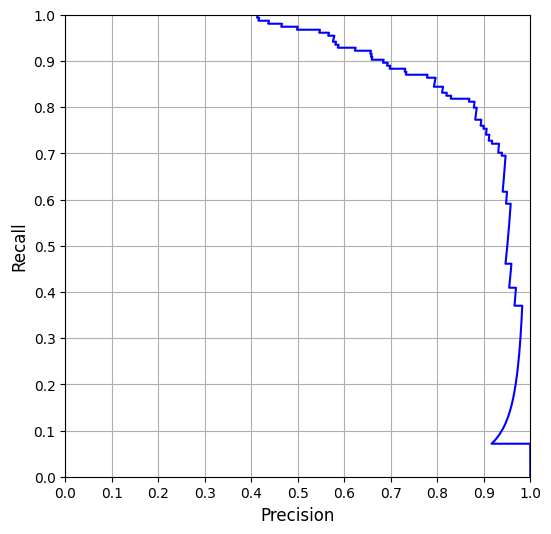

In [ ]:
plt.figure(figsize=(6, 6))
plt.grid(True)
plt.plot(prec_c_10, rec_c_10, color='blue')
plt.xlabel('Precision', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks(np.linspace(0, 1, 10 + 1))
plt.yticks(np.linspace(0, 1, 10 + 1))
plt.show();

In [ ]:
np.where(prec_c_10 > demand_precision)

(array([404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416,
        417, 418, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435,
        436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448,
        449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461,
        462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474,
        475, 476, 477, 478, 487, 488, 489, 490, 491, 492, 493, 494, 495,
        496, 497, 498], dtype=int64),)

In [ ]:
demand_index = np.min(np.where(prec_c_10 > demand_precision))
demand_index

404

In [ ]:
print(f"Precision: {precision_score(test_df['toxic'], model_pipeline_c_10.predict_proba(test_df['comment'])[:, 1] > thresholds_c_10[demand_index])}")
print(f"Recall: {recall_score(test_df['toxic'], model_pipeline_c_10.predict_proba(test_df['comment'])[:, 1] > thresholds_c_10[demand_index])}")

Precision: 0.9574468085106383
Recall: 0.5844155844155844
